In [17]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('TCS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open","High","Low",
             "Close","Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2022-01-13  10.80  11.00  10.70  10.72      10.72  353300
1 2022-01-14  10.50  10.75  10.29  10.60      10.60  476000
2 2022-01-18  10.45  10.50  10.17  10.17      10.17  376000
3 2022-01-19  10.20  10.47  10.17  10.35      10.35  360800
4 2022-01-20  10.45  10.75  10.15  10.17      10.17  700900


In [21]:
# candlesticks chart

figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "TCS Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()



In [8]:
#simple Moving Average

def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# 50-days Moving Average

n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

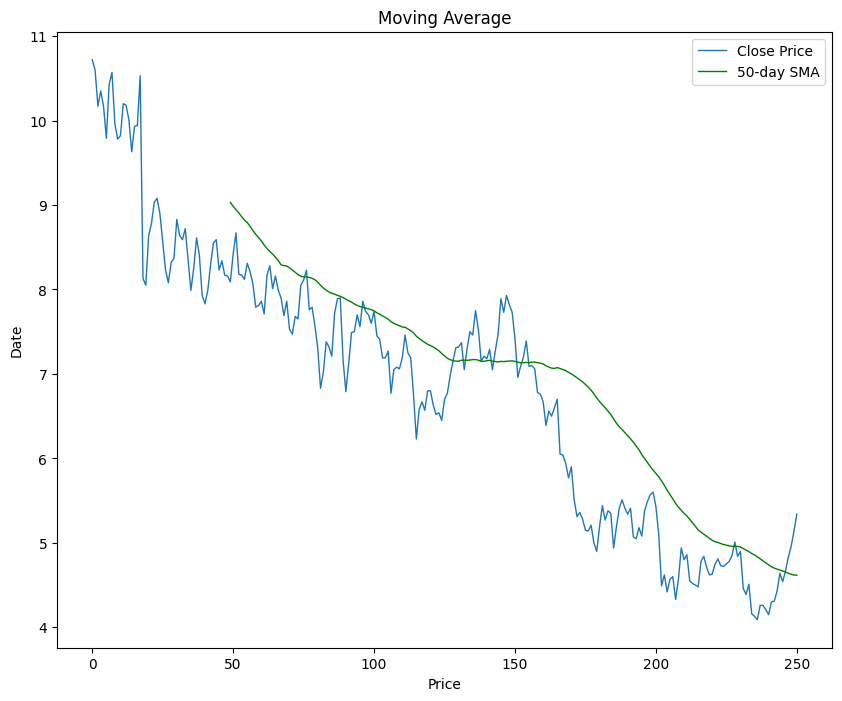

In [13]:
## Plotting the "TCS" Price Series chart and Moving Average Below:-

plt.figure(figsize=(10,8))

# Title
plt.title('Moving Average')
plt.xlabel('Price')
plt.ylabel('Date')

plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')

plt.legend()

plt.show()

In [22]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [23]:
figure = px.line(data, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()